In [23]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
x_label='sepal length (cm)'
y_label='petal length (cm)'
cols = list(iris.frame.columns)[:-1]
df=iris.frame

Оценка качества кластеризации

In [25]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
! pip install sklearn_som
from sklearn_som.som import SOM

np.random.seed(1234)
num_clusters = 3
names = [ 'Kmeans', 
         'Single Linkage', 'Average Linkage', 'Complete Linkage', 'Ward Linkage', 
         
         'DBSCAN (0.35)', 'DBSCAN (0.5)', 'DBSCAN (0.75)', 'DBSCAN (1.)',
        "Gaussian Mixture", 'SOM']
clusterizators = [
    KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=10, verbose =0),
    AgglomerativeClustering(n_clusters=num_clusters, linkage='single'),
    AgglomerativeClustering(n_clusters=num_clusters, linkage='complete'),
    AgglomerativeClustering(n_clusters=num_clusters, linkage='average'),
    AgglomerativeClustering(n_clusters=num_clusters, linkage='ward'),
    
    DBSCAN(eps=0.35, min_samples=15),
    DBSCAN(eps=0.5, min_samples=15),
    DBSCAN(eps=0.75, min_samples=15),
    DBSCAN(eps=1., min_samples=15),
    GaussianMixture( n_components=num_clusters, covariance_type="full"),
    SOM(m=num_clusters, n=1, dim=4),
    
    
]


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [26]:
from sklearn import metrics
metrics_name = [ 'homogeneity_score', 'completeness_score', 'v_measure_score']
    
clustering_metrics = [
       
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score   
    ]

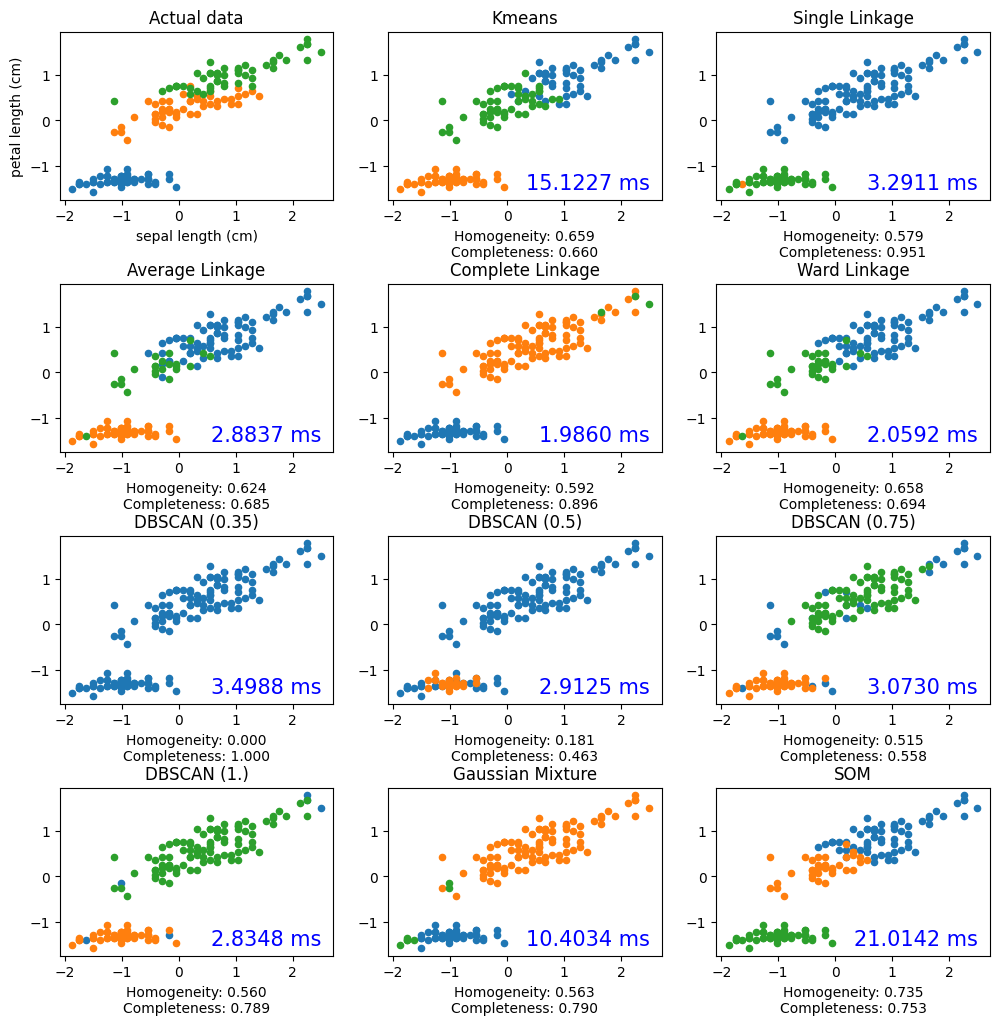

In [27]:
import time
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.iloc[:,0:4])

res_df=pd.DataFrame(columns=['Metric'])
res_df['Metric'] = np.array(['homogeneity_score', 'completeness_score', 'v_measure_score', 'time, ms'])

fig = plt.figure(figsize=(12,12))
size = 20
ax = plt.subplot(4, 3, 1)
ax.set_xlabel(x_label)             
ax.set_ylabel(y_label)  
plt.title('Actual data')
dfr = pd.DataFrame(X)
dfr.columns = cols
dfr['class'] = df['target']

for c, rows in dfr.groupby('class'):
    plt.scatter(rows[x_label], rows[y_label], s = size)

# iterate over clusterizators
i = 2
for name, cmodel in zip(names, clusterizators):
    ax = plt.subplot(4, 3, i)
    t0 = time.time()
    cmodel.fit(X)
    dfr = pd.DataFrame(X)
    dfr.columns = cols
    
    if hasattr(cmodel, "fit_predict"):
            dfr['class'] = cmodel.fit_predict(X)
    else:
            dfr['class'] = cmodel.algorithm.labels_.astype(int)
         
    
    t1 = time.time()
    text1 = f"Homogeneity: {metrics.homogeneity_score(df['target'], dfr['class']):.3f}"
    text2 = f"Completeness: {metrics.completeness_score(df['target'], dfr['class']):.3f}"
    
    r=[]
    for metric_name, m in zip(metrics_name, clustering_metrics):
        score =m(df['target'],dfr['class'])
        r.append(score)
    r.append((t1 - t0)*1000)
    res_df[name] = np.array(r)  
    
    ax.set_xlabel(text1+'\n'+text2)             
  
    plt.title(name)
    for c, rows in dfr.groupby('class'):
        
        plt.scatter(rows[x_label], rows[y_label], s = size)
    dt=(t1 - t0)*1000
    ax.text(2.5,
            -1.5, ('%.4f ms' % (dt)).lstrip('0'), 
            size=15, horizontalalignment='right', color='b')
    i += 1
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [28]:
scores=res_df.set_index("Metric").transpose()
scores

Metric,homogeneity_score,completeness_score,v_measure_score,"time, ms"
Kmeans,0.659127,0.659848,0.659487,15.122652
Single Linkage,0.579380,0.951166,0.720118,3.291130
Average Linkage,0.624036,0.684890,0.653048,2.883673
Complete Linkage,0.592280,0.895840,0.713099,1.986027
Ward Linkage,0.657882,0.694025,0.675470,2.059221
DBSCAN (0.35),0.000000,1.000000,0.000000,3.498793
DBSCAN (0.5),0.180652,0.463222,0.259933,2.912521
DBSCAN (0.75),0.514961,0.558235,0.535726,3.072977
DBSCAN (1.),0.559507,0.789066,0.654748,2.834797
Gaussian Mixture,0.562503,0.789928,0.657094,10.403395


In [29]:
import holoviews as hv
import hvplot
import hvplot.pandas
hv.extension('bokeh')

In [30]:
scores.hvplot.bar(width=1000, rot=90, y=['homogeneity_score', 'completeness_score',	'v_measure_score']).opts( height=500, width=1000)

:Bars   [index,Metric]   (value)

In [31]:
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...